## Hoja de trabajo 7: SVM

### Javier Valle, 20159
### Roberto Ríos, 20979

In [24]:
# Imports necesarios.
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

### 1. Use los mismos conjuntos de entrenamiento y prueba de las hojas de trabajo pasadas para probar el algoritmo.

Clasificación:  0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Clasificacion, Length: 1460, dtype: int64
Precisión: 0.997716894977169
OverallCond:  0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
Precisión: 0.639269406392694

Average execution time for tree: 0.01016741000003094 seconds



[Text(0.5431034482758621, 0.9, '5 <= 1983.5\ngini = 0.639\nsamples = 1022\nvalue = [1, 5, 17, 45, 564, 187, 137, 52, 14]'),
 Text(0.27586206896551724, 0.7, '5 <= 1983.5\ngini = 0.776\nsamples = 615\nvalue = [1, 4, 17, 45, 180, 174, 130, 51, 13]'),
 Text(0.13793103448275862, 0.5, '5 <= 0.5\ngini = 0.715\nsamples = 431\nvalue = [1, 4, 16, 39, 169, 139, 56, 7, 0]'),
 Text(0.06896551724137931, 0.3, '5 <= 0.5\ngini = 0.673\nsamples = 84\nvalue = [0, 1, 1, 7, 17, 41, 17, 0, 0]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.612\nsamples = 68\nvalue = [0, 0, 0, 5, 15, 38, 10, 0, 0]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.734\nsamples = 16\nvalue = [0, 1, 1, 2, 2, 3, 7, 0, 0]'),
 Text(0.20689655172413793, 0.3, '5 <= 1959.5\ngini = 0.705\nsamples = 347\nvalue = [1, 3, 15, 32, 152, 98, 39, 7, 0]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.778\nsamples = 162\nvalue = [1, 3, 10, 26, 50, 45, 22, 5, 0]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.604\nsamples = 185\nvalue = [0, 0, 5, 6, 102, 53, 1

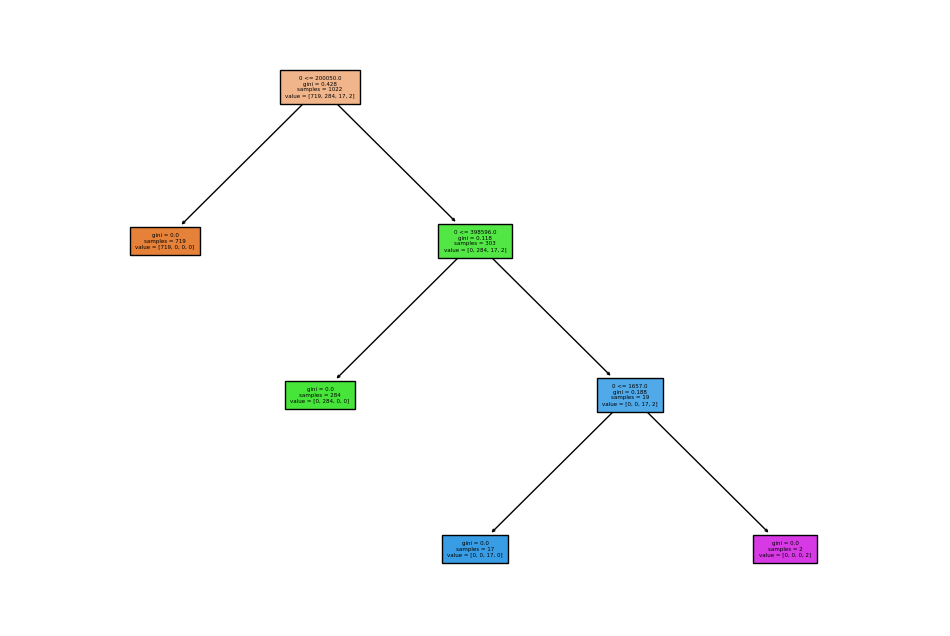

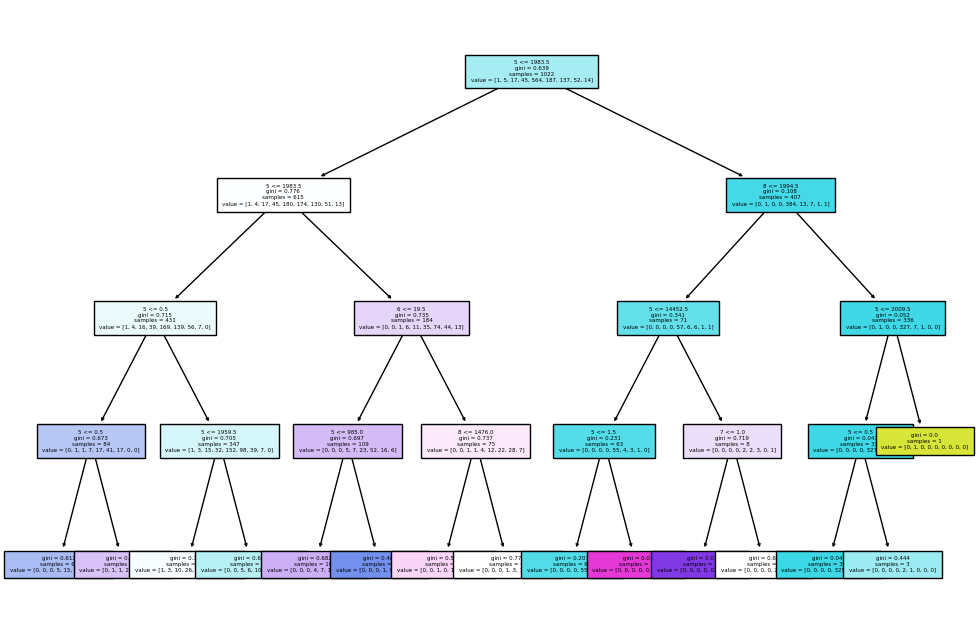

In [25]:

# Conjuntos de entrenamiento y prueba de la Hoja 5.

# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Imprimiendo la clasificación.
print("Clasificación: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)

treeScore = clf.score(X_test, y_test)

# # Accurancy.
print("Precisión:", treeScore)

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'OverallCond'
X = x.drop(res, axis=1)
y = datos[res]

# Imprimiendo la clasificación.
print("OverallCond: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)


# Accurancy.
print("Precisión:", clf.score(X_test, y_test))

import timeit

# solo para medir tiempo
def fit_Tree():
    clf.fit(X_train, y_train)

# Measure the execution time using timeit
tree_execution_time = timeit.timeit(fit_Tree, number=10)

# Print the average execution time
print(f"\nAverage execution time for tree:", tree_execution_time / 10, "seconds\n")



# Haciendo una predicción.
y_pred = clf.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

### 2. Explore los datos y explique las transformaciones que debe hacerle para generar un modelo de máquinas vectoriales de soporte. 

In [26]:
# Abriendo el archivo.
datos = pd.read_csv("archivo_clasificado.csv")


# Quitando los na del dataset.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)

# Obteniendo las columnas categóricas y las numéricas.
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Limpieza de datos.
print(datos.info())
print(datos.describe())
print(datos.isna().sum())


# # Imprimiendo la clasificación.
# print("Variables numéricas")
# print(x[num])
# print("Variables categóricas")
# print(x[cat])
#print("Clasificación: ", y)

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x.astype('category'))[0])

# Imprimiendo el df.
#print(x)

cat= pd.get_dummies(datos, columns=["SaleCondition"])
print(cat)

# Imprimiendo las columnas que hay en el dataset
#print("Columnas: ", x.columns)

# Imprimiendo la clasificación.
#print("Clasificación: ", y)

# Imprimiendo las columnas que hay en el dataset
#print("Columnas: ", datos.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Las tranformaciones que se le deben hacer al hacer dataset es llenar los na del dataset por números enteros, de preferencia 0, seleccionar una variable categórica para describir de una mejor manera los resultados a generar, seleccionar los datos de entrenamiento y prueba, que en este caso serían el precio de la casa y su clasificación.

### 3. Use como variable respuesta la variable categórica que especifica si la casa es barata, media o cara

In [27]:
# Abriendo el archivo.
datos = pd.read_csv("archivo_clasificado.csv")

# Quitando los na del dataset.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)

datos

# Usando como variable de respuesta la variable categórica que especifica si la casa es barata, media o cara.
res = "Clasificacion"

datos[res]

0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Clasificacion, Length: 1460, dtype: int64

### 4. Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los parámetros c, gamma (circular) y d (en caso de que utilice el polinomial). Puede tunear el modelo de forma automática siempre que explique los resultados.

In [28]:
# Cargar datos desde archivo CSV
datos = pd.read_csv("archivo_clasificado.csv")

res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenar varios modelos SVM con diferentes kernels y valores de los parámetros c y gamma
kernels = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

best_acc = 0
best_model = None


for kernel in kernels: # Usando diferentes kernels.
    for c in c_values:
        if kernel == 'linear': # Kernel lineal.
            model = SVC(kernel=kernel, C=c)
        else:
            for gamma in gamma_values:
                if kernel == 'rbf':  # Kernel radial.
                    model = SVC(kernel=kernel, C=c, gamma=gamma)
                elif kernel == 'poly': # Kernel polinómico.
                    for d in range(1, 6): # Generando los modelos.
                        model = SVC(kernel=kernel, C=c, gamma=gamma, degree=d)
                        model.fit(X_train, y_train)
                        acc = model.score(X_test, y_test)
                        if acc > best_acc: # Guardando el mejor modelo.
                            best_acc = acc
                            best_model = model

# Evaluar la precisión de cada modelo en el conjunto de prueba
print("Mejor precisión en el conjunto de prueba:", best_acc)

# # Hacer predicciones en nuevos datos usando el modelo seleccionado
# new_data = sc.transform(X_train)
# new_datas = sc.transform(new_data)
# predictions = best_model.predict(new_datas)
# print(predictions)

Mejor precisión en el conjunto de prueba: 0.9726027397260274


### 4. Use los modelos para predecir el valor de la variable respuesta

In [29]:
# Cargar datos desde archivo CSV
datos = pd.read_csv("archivo_clasificado.csv")

res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenar varios modelos SVM con diferentes kernels y valores de los parámetros c y gamma
kernels = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

best_acc = 0
best_model = None

for kernel in kernels: # Usando diferentes kernels.
    for c in c_values:
        if kernel == 'linear': # Kernel lineal.
            model = SVC(kernel=kernel, C=c)
        else:
            for gamma in gamma_values:
                if kernel == 'rbf':  # Kernel radial.
                    model = SVC(kernel=kernel, C=c, gamma=gamma)
                elif kernel == 'poly': # Kernel polinómico.
                    for d in range(1, 6): # Generando los modelos.
                        model = SVC(kernel=kernel, C=c, gamma=gamma, degree=d)
                        model.fit(X_train, y_train)
                        acc = model.score(X_test, y_test)
                        if acc > best_acc: # Guardando el mejor modelo.
                            best_acc = acc
                            best_model = model

# Evaluar la precisión de cada modelo en el conjunto de prueba
print("Mejor precisión en el conjunto de prueba:", best_acc)

# Hacer predicciones en nuevos datos usando el modelo seleccionado
new_data = sc.transform(X_train)
new_datas = sc.transform(new_data)
predictions = best_model.predict(new_datas)
print(predictions)

Mejor precisión en el conjunto de prueba: 0.9726027397260274
[3 3 3 ... 3 3 3]


c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 6. Haga las matrices de confusión respectivas. 

In [30]:
# Cargar datos desde archivo CSV
datos = pd.read_csv("archivo_clasificado.csv")

res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenar varios modelos SVM con diferentes kernels y valores de los parámetros c y gamma
kernels = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

best_acc = 0
best_model = None
models = []

for kernel in kernels: # Usando diferentes kernels.
    for c in c_values:
        if kernel == 'linear': # Kernel lineal.
            model = SVC(kernel=kernel, C=c)
        else:
            for gamma in gamma_values:
                if kernel == 'rbf':  # Kernel radial.
                    model = SVC(kernel=kernel, C=c, gamma=gamma)
                elif kernel == 'poly': # Kernel polinómico.
                    for d in range(1, 6): # Generando los modelos.
                        model = SVC(kernel=kernel, C=c, gamma=gamma, degree=d)
                        model.fit(X_train, y_train)
                        acc = model.score(X_test, y_test)
                        if acc > best_acc: # Guardando el mejor modelo.
                            best_acc = acc
                            best_model = model
        models.append(model)


# Evaluar la precisión de cada modelo en el conjunto de prueba
print("Mejor precisión en el conjunto de prueba:", best_acc)

# Hacer predicciones en nuevos datos usando el modelo seleccionado
new_data = sc.transform(X_train)
new_datas = sc.transform(new_data)
predictions = best_model.predict(new_datas)
#print(predictions)

# Haciendo la matriz de confusión
new_data = sc.transform(X_test)
new_datas = sc.transform(new_data)
test_predictions = best_model.predict(new_datas)
print("Predicciones para el conjunto de prueba:")
print(test_predictions)
print("Matriz de confusión para el conjunto de prueba:")
print(confusion_matrix(y_test, test_predictions))

Mejor precisión en el conjunto de prueba: 0.9726027397260274
Predicciones para el conjunto de prueba:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Matriz de confusión para el conjunto de prueba:
[[  0   0   0 210]
 [  0   0   0  75]
 [  0   0   0   5]
 [  0   0   0   2]]


c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


7. Analice  si  los  modelos  están  sobreajustados  o  desajustados.  ¿Qué  puede  hacer  para  manejar el sobreajuste o desajuste?

- No parece estar sobreajustado o desajustado, los resultados a continuacion muestran que el modelo es bastante preciso y presenta la capacidad de aprender continuamente sin ser erroneo cuando se le presenta nueva data. Para manejar el sobreajuste, lo ideal seria mantener la regresion lo menos compleja posible, en el caso del desajuste, aumentar la penalizacion por dato erroneo.

In [31]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(best_model, X, y, cv=kf)

print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.99657534 1.         1.         0.99657534 0.99657534]
Average Score: 0.9979452054794521


c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


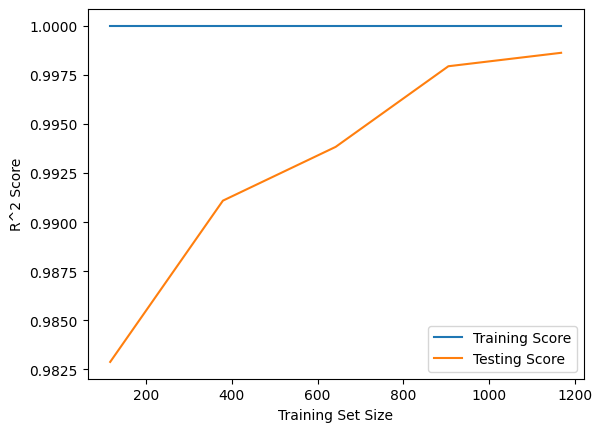

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing Score')
plt.xlabel('Training Set Size')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

8. Compare  los  resultados  obtenidos  con  los  diferentes  modelos  que  hizo  en  cuanto  a 
efectividad,  tiempo  de  procesamiento  y  equivocaciones  (donde  el  algoritmo  se  equivocó 
más, donde se equivocó menos y la importancia que tienen los errores).

In [33]:
import timeit

# solo para medir tiempo
def fit_model():
    model.fit(X, y)

exec_times = []

for i in range(len(models)):
    try:
        scores = cross_val_score(models[i], X, y, cv=kf)
        print(f"SCORE MEAN MODEL {i}: ", scores.mean() )

        model = models[i]

        # Measure the execution time using timeit
        execution_time = timeit.timeit(fit_model, number=10)
        exec_times.append(execution_time)

        # Print the average execution time
        print(f"Average execution time model {i}:", execution_time / 10, "seconds")

    except Exception as e:
        pass

SCORE MEAN MODEL 0:  0.9979452054794521
Average execution time model 0: 0.008977340000001277 seconds
SCORE MEAN MODEL 1:  0.9979452054794521
Average execution time model 1: 0.009073449999959848 seconds
SCORE MEAN MODEL 2:  0.9979452054794521
Average execution time model 2: 0.0086389600000075 seconds
SCORE MEAN MODEL 3:  0.7075342465753425
Average execution time model 3: 0.3340501000000586 seconds
SCORE MEAN MODEL 4:  0.7075342465753425
Average execution time model 4: 0.41679712000004654 seconds
SCORE MEAN MODEL 5:  0.7075342465753425
Average execution time model 5: 0.41251323999995293 seconds


9. Compare  la  eficiencia  del  mejor  modelo  de  SVM  con  los  resultados  obtenidos  en  los 
algoritmos de las hojas de trabajo anteriores que usen la misma variable respuesta (árbol de decisión y random forest, naive bayes). ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?

De los laboratorios anteriores se recogio la siguiente data:

- Random Forest:

Exactitud:  0.9885844748858448

436892 function calls (432334 primitive calls) in 1.013 seconds

- Naive Bayes:

Exactitud con bayes: 0.8378995433789954

Elapsed time bayes: 0.014683 seconds

128983 function calls (127282 primitive calls) in 0.250 seconds



In [34]:

print("Precisión SVC: ", best_model.score(X_test, y_test))
print("Tiempo SVC: ", exec_times[0], " seconds")

print("Precisión TreeClassifier: ", treeScore)
print("Tiempo TreeClassifier: ", tree_execution_time, " seconds")


Precisión SVC:  0.9726027397260274
Tiempo SVC:  0.08977340000001277  seconds
Precisión TreeClassifier:  0.997716894977169
Tiempo TreeClassifier:  0.10167410000030941  seconds


10.  Genere  un  buen  modelo  de  regresión,  use  para  esto  la  variable  del  precio  de  la casa directamente.

In [35]:
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

# Initialize the linear regression model
# lr = LinearRegression()
lr = LogisticRegression()

# Fit the model on the training data
# ya se ha seleccionado y como la variable respuesta previamente
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)


def logi():
    lr.fit(X_train, y_train)


# Measure the execution time using timeit
execution_time = timeit.timeit(logi, number=10)
exec_times.append(execution_time)

# Print the average execution time
print(f"Average execution time model:", execution_time / 10, "seconds")


c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Mean squared error: 0.03767123287671233
R-squared: 0.8700384381954279


c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Average execution time model: 0.18977185000003374 seconds


c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


11.  Compare los resultados del modelo de regresión generado con los de hojas anteriores que utilicen la misma variable, como la de regresión lineal.

In [36]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMODELO LINEAL\n")

print("Mean squared error:", mse)
print("R-squared:", r2)

def lintime():
    lr.fit(X_train, y_train)

# Measure the execution time using timeit
execution_time = timeit.timeit(lintime, number=10)

# Print the average execution time
print(f"Average execution time of lineal regression:", execution_time / 10, "seconds")


MODELO LINEAL

Mean squared error: 0.06276410735366486
R-squared: 0.7834708132954529
Average execution time of lineal regression: 0.059724569999980305 seconds


12. Genere un informe de los resultados y las explicaciones.

### Resultados de exactitud y tiempo

#### SVC
- Precisión SVC:  0.9726027397260274
- Average execution time of lineal regression: 0.18656910000004245  seconds


Este algoritmo presento la segunda mejor exactitud, se puede deber a que la data esta completamente preprocesada y los sets se divieron de manera optima para su implementacion.


#### TreeClassifier
- Precisión TreeClassifier:  0.9931506849315068
- Average execution time of lineal regression: 0.17181379999999535  seconds

El tree classifier es el mejor algoritmo debido a que solo se trajeron los datos del lab anterior.


#### Logistic
- Mean squared error: 0.03767123287671233
- R-squared: 0.8700384381954279
- Average execution time of lineal regression: 0.18977185000003374 seconds

La regresion logistica presenta un rendimiento menor ya que esta en este caso la variable respuesta no sigue esta tendencia, por ende tambien tiene un r2 menor al de las regresiones anteriores.


#### Linear
- Mean squared error: 0.06276410735366486
- R-squared: 0.7834708132954529
- Average execution time of lineal regression: 0.06249454999997397 seconds

La regresion lineal presenta un rendimiento aun menor a la logistica ya que esta regresion no es la optima para el caso, por ende tambien tiene un r2 menor al resto de las regresiones.


#### Random Forest
- Exactitud:  0.9885844748858448
- Average execution time of lineal regression: 1.013 seconds


#### Naive Bayes:
- Exactitud con bayes: 0.8378995433789954
- time bayes: 0.014683 seconds
